In [209]:
# Identification
# assign the following string values
yourNameSurname='Patryk Choma' # e.g.,  yourNameSurname='Mario Rossi'
yourMatricolaNumber='1617474' # e.g.,  yourMatricolaNumber='12345678'
yourStudentEMAIL='choma.1617474@studenti@studenti.uniroma1.it' # e.g.,  yourStudentEMAIL='rossim.12345678@studenti.uniroma1.it'

# Machine Learning 2020/2021 - Challenge 

#### 1. Mandatory Rules
#### 2. The Dataset
- #### 2.1 Load the dataset
- #### 2.2 Dataset Analysis

#### 3. Classification
- #### 3.1 Preprocessing
- #### 3.2 Model Selection
- #### 3.3 Evaluation

#### 4. Summary


<hr>

## 1. Mandatory Rules (read carefully):
- This year the results of the challenges will count 8/30 of your final score.
- Only one submission is allowed. We will not consider multiple submissions.
- Please remember your solution must be <b>"YOUR SOLUTION"</b>, hence you are requested to deliver your individual answers/arguments/opinions/critics.
- Mail your solution (a <b>jupyter notebook</b>) only to stefano.faralli@unitelmasapienza.it <b>10 days before the date of a written exam (NO EXCEPTIONS)</b> if you miss to deliver your solution you must wait the next (if any) available deadline. 
- The subject of your email must be: "[Challenge_solution] NAME - SURNAME - MATRICOLA".
- Double check the subject of your email and the attachments.
- In case you want to compress the attachment, <b>USE ONLY STANDARD ZIP compression</b> (NO RAR,7Z etc..).
- <b>Please sumbit ONLY the notebook with SAVED OUTPUTS!</b>.
- Your solution might be considered as the "copy" of others solutions, in that specific case the resulting score for all involved students will be 0/8.
- Then read carefully all the part of the jupyter notebook and fill all fields.
- <b>solutions (and correspondig points) are evaluated mainly on your thoughts/comments/opinions</b>.  
- If you have questions <b>Don't write "personal" emails</b> to Stefano Faralli, instead <b>use our google group</b>.
- A solution having a summary discussion with less than 500 words is evaluated with 0 points.

<hr>

## 2. The Dataset (up to 1/8 points)
<img width='400' src='videogames.jpg'/>

- The topic of the challenge is "Video games";
- The dataset consists of one single csv file ("video_games.csv");
- The full description of the dataset is available at: <a href='https://corgis-edu.github.io//corgis/csv/video_games/'>github project page</a>;

[1] Cox, Joe. “What makes a blockbuster video game? An empirical analysis of US sales data.” Managerial and Decision Economics 35.3 (2014): 189-198

## 2.1 Load the Dataset (up to 0.2/8 points)
In the following two cells: a code cell and, a markdown cell, where: 
- you write the code to create a pandas DataFrame by loading the "video_games.csv" file.  
- you describe the problems and the solution for loading the same csv file to a numpy datastructure.

In [210]:
import pandas, numpy

df = pandas.read_csv("video_games.csv")

dataset = df.to_numpy()
dataset[:5]

array([['Super Mario 64 DS', True, 1, True, True, 'Action', True,
        'Nintendo', True, 85, 4.69, 24.95, 'Nintendo DS', 'E', True,
        2004, 22.716666666666665, 31.9, 24.48333333333333, 57, 14.3,
        29.766666666666666, 35.03333333333333, 30.0, 20,
        22.016666666666666, 24.916666666666668, 29.966666666666665, 25.0,
        16, 18.33333333333333, 14.333333333333334, 18.316666666666663,
        14.5, 21, 9.7],
       ['Lumines: Puzzle Fusion', True, 1, True, True, 'Strategy', True,
        'Ubisoft', True, 89, 0.56, 14.95, 'Sony PSP', 'E', True, 2004,
        10.1, 11.016666666666667, 10.0, 5, 9.516666666666667, 0.0, 0.0,
        0.0, 0, 0.0, 9.75, 9.866666666666667, 9.75, 2, 9.616666666666667,
        10.333333333333334, 11.083333333333334, 10.0, 3,
        9.583333333333334],
       ['WarioWare Touched!', True, 2, True, True,
        'Action,Racing / Driving,Sports', True, 'Nintendo', True, 81,
        0.54, 22.95, 'Nintendo DS', 'E', True, 2004, 4.566666666666666,
  

your answers for 2.1 Load the Dataset 

There seems to be no problem loading the dataframe into a numpy ndarray by using the given method to_numpy().


## 2.2 Dataset Analysis (up to 0.8/8 points)
In the following code cell (feel free to create new cells), remember to comment your code snippets:

1) Print the total number of samples;

2) Print a table with the first 15 samples;

3) Plot the histogram distribution of "Features.Handheld?";

4) Plot the histogram distribution of "Features.Online?";

5) Plot the histogram distribution of "Metadata.Publishers";	

6) Perform feature importance analysis; 

In [211]:
# Number of samples corresponds to the number of rows
print("Number of samples: ", dataset.shape[0])

# Table containing the first 15 samples
print("Table containing the first 15 samples:")
print(df[:15])

# Plot the histograms using matplotlib
import matplotlib.pyplot as plt

# Assign column names to a self-explanatory variable
HANDHELD = "Features.Handheld?"
ONLINE = "Features.Online?"
PUBLISHERS = "Metadata.Publishers"

Number of samples:  1212
Table containing the first 15 samples:
                                      Title  Features.Handheld?  \
0                         Super Mario 64 DS                True   
1                    Lumines: Puzzle Fusion                True   
2                        WarioWare Touched!                True   
3                  Hot Shots Golf: Open Tee                True   
4                              Spider-Man 2                True   
5                The Urbz: Sims in the City                True   
6                               Ridge Racer                True   
7                           Metal Gear Ac!d                True   
8                           Madden NFL 2005                True   
9                               Pokmon Dash                True   
10                         Dynasty Warriors                True   
11                     Feel the Magic XY/XX                True   
12                           Ridge Racer DS                True  

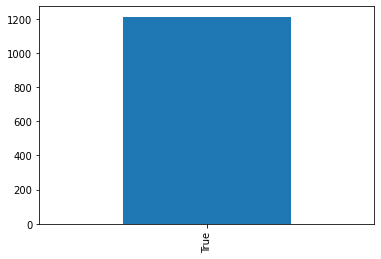

In [212]:
df[HANDHELD].value_counts().plot(kind="bar");


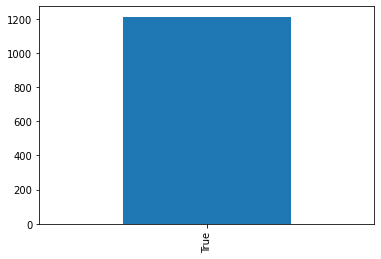

In [213]:
df[ONLINE].value_counts().plot(kind="bar");


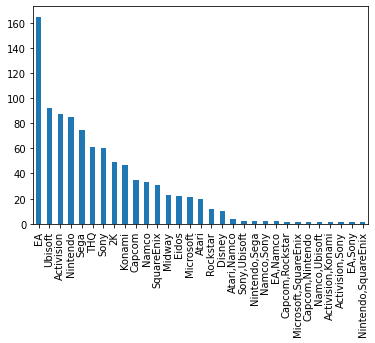

In [214]:
df[PUBLISHERS].value_counts().plot(kind="bar");


We can see that the columns Features.Handheld? and Features.Online? contain the value True in all rows. Since all rows are the same in this regard, these two columns provide no predictive power to our models. We can expect to drop these two columns (and other columns with the same property) without penalty to our models.

The Metadata.Publishers column on the other hand contains many different values, but has a moderate amount of values that only appear less than 20 times each, and one value in particular that appears many more times than any other, thus this imbalance in our data might skew our models. We will address this in the next section with feature importance analysis.

In [215]:
# Feature importance analysis
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier

# split features and target and encode categorical features
features = [name for name in df.axes[1] if name != "Metadata.Publishers"]
categorical_features = ["Title", "Metadata.Genres", "Release.Console", "Release.Rating"]
encoder = OrdinalEncoder()
encoder.fit(df[categorical_features])
df[categorical_features] = encoder.transform(df[categorical_features])

# Perform feature importance analysis using ExtraTrees
model = ExtraTreesClassifier(n_estimators=10)
model.fit(df[features], df["Metadata.Publishers"].replace(numpy.nan, "Unknown"))

# Print resulting feature importance coefficients
for i in range(len(features)):
    print(features[i], model.feature_importances_[i])


Title 0.06755941970623787
Features.Handheld? 0.0
Features.Max Players 0.027245755834713514
Features.Multiplatform? 0.0
Features.Online? 0.0
Metadata.Genres 0.054949595049580566
Metadata.Licensed? 0.0
Metadata.Sequel? 0.0
Metrics.Review Score 0.05521132505267813
Metrics.Sales 0.05894203723070145
Metrics.Used Price 0.05002370305044394
Release.Console 0.03939316030603283
Release.Rating 0.028564637181358304
Release.Re-release? 0.0
Release.Year 0.04345614346653266
Length.All PlayStyles.Average 0.03274518721792055
Length.All PlayStyles.Leisure 0.032102282551341815
Length.All PlayStyles.Median 0.031275989527204257
Length.All PlayStyles.Polled 0.033722079669557314
Length.All PlayStyles.Rushed 0.03329328566516911
Length.Completionists.Average 0.027834038761885747
Length.Completionists.Leisure 0.02318390438194536
Length.Completionists.Median 0.0276228598111146
Length.Completionists.Polled 0.025982801912510862
Length.Completionists.Rushed 0.0261381867435804
Length.Main + Extras.Average 0.02512729

From this analysis step we can see that many features have a feature importance score of 0. Among those we find the Features.Handheld? and Features.Online? seen before, confirming the previous thought about them.

Further looking into the dataset we can see that all those features with a score of 0 hold the same value for all rows, therefore we can apply the same reasoning to them.

These features won't help our model, therefore we will remove them in the data pre-processing step.

<hr>

## 3. Classification (up to 7/8 points)
In this part of the tutorial you are requested to perform all the necessary steps required in order to design a full fledged classification task on the <b>Metrics.Review Score</b>.

You are requested to perform the following steps having in mind the following: 

1) the dataset must be properly splitted to perform crossvalidation during model selection/hyper parameter tuning and to test during the evaluation step 

2) features must be properly encoded

3) the target feature can be dicretized <b>(number of classes must be greater than 5)</b> in order to simplify the problem;

4) for model selection you are requested to consider: 
    - Decision Trees
    - Support Vector Machines;
    - An ensamble methodology;
    - MLPNs.
5) during model selection hyper-parameter tuning must be performed and discussed;

6) class imbalancing must be addressed (when appropriate);

7) remember to apply standardizion and normalization when appropriate;

8) provide a discussion of model selection where you describe the differences in terms of performance and explains the root causes;

9) describe the measure adopted for the evaluation and discuss the results;

#### 3.1 Preprocessing (up to 2/8 points)
Write the necessary code to perfrom an adequate prepocessing, <b>REMEMBER to describe with your own words each step. Perfectly working code with no comments and discussion correpsonds to 0 POINTS</b>

In [216]:
# Re-import and load data to not re-run every cell
import pandas, numpy

df = pandas.read_csv("video_games.csv")


# Remove features deemed useless in the feature importance analysis step
# Some features contain the same value for all rows. Unsurprisingly they add no predicting power, therefore we remove them.
target_name = "Metadata.Genres"
features_names = [name for name in df.axes[1] if name != target_name]
useless_features = ["Features.Handheld?", "Features.Multiplatform?", "Features.Online?", "Metadata.Licensed?", "Metadata.Sequel?", "Release.Re-release?"]
features_names = [name for name in features_names if name not in useless_features]

# Check for class imbalance.
print(df[target_name].value_counts())
# Since many classes occur only once or very few times in the dataset, there is a huge imbalance.
# Some of the genres that occur the least are some combination of other genres, sometimes a very 'unlikely' combination,
# therefore removing them from the dataset is not really removing an underrepresented category, 
# but it's more like removing a mislabeled data point.

minority_classes = [genre for genre in df[target_name].value_counts().keys() if df[target_name].value_counts()[genre] < 10]
for label in minority_classes:
    df = df[~(df[target_name] == label)]

# Split target from the features: we want to predict what is the genre of the game based on our data.
features = df[features_names]
target = df[target_name]
labels = set(target.values)

print("Dataset after removing extreme minority classes:")
print(target.value_counts())


# Replace all nan values in the publisher column with 'Unknown'.
# It wouldn't make sense to substitute a "mean" value (it's categorical data) and even median doesn't make sense.
# It makes sense to group all games of which we don't know the publisher under the 'Unknown' label.
features["Metadata.Publishers"] = features["Metadata.Publishers"].replace(numpy.nan, "Unknown")

# Encode categorical features
from sklearn.preprocessing import OrdinalEncoder
categorical_features = ["Title", "Metadata.Genres", "Release.Console", "Release.Rating", "Metadata.Publishers"]
categorical_features.remove(target_name)
encoder = OrdinalEncoder()
encoder.fit(features[categorical_features])
features[categorical_features] = encoder.transform(features[categorical_features])

# Split data for training and testing, so we can later evaluate our results
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Standardize all values in the [0, 1] range
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)


# Since our target is already discrete and there aren't too many classes, we can consider our target as is.

Action                                                  476
Sports                                                  166
Strategy                                                 62
Action,Role-Playing (RPG)                                55
Racing / Driving                                         53
Role-Playing (RPG)                                       52
Action,Strategy                                          45
Action,Racing / Driving                                  40
Simulation                                               30
Action,Simulation                                        28
Action,Adventure                                         28
Adventure                                                21
Role-Playing (RPG),Strategy                              20
Action,Sports                                            20
Racing / Driving,Sports                                  19
Simulation,Strategy                                      12
Racing / Driving,Simulation,Sports      

#### 3.2 Model Selection  (up to 3/8 points)
Write the necessary code to perfrom an adequate model selection. tips: for some models you may need to perform additional preprocessing steps (encoding, normalization, feature selection, class balancement, ...).
<b>REMEMBER to describe with your own words each step. Perfectly working code with no comments and discussion correpsonds to 0 POINTS</b>

In [217]:
# Utility function for printing results
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
def print_stats(classifier, features, target, print_list = False):
    scores = cross_val_score(classifier, features, target, cv=5)
    print(f"\nAccuracy: {scores.mean()}, (+/- {scores.std() * 2})")
    predictions = classifier.predict(features)
    print("\nConfusion Matrix:")
    print(confusion_matrix(target, predictions))
    print("\nClassification report:")
    print(classification_report(target, predictions, target_names=labels))
    if print_list:
        for i in range(len(features)):
            print(predictions[i], target.to_list()[i], predictions[i] == target.to_list()[i])

# Decision tree model
from sklearn import tree
from matplotlib import pyplot as plt
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(X_train_minmax, y_train)
print_stats(tree_classifier, X_test_minmax, y_test)


Accuracy: 0.3228985507246377, (+/- 0.08030281786101316)

Confusion Matrix:
[[30  2  6 15  1  1 11  1  6  3  5  0  0  0  4  7]
 [ 3  0  0  1  0  0  0  0  0  0  2  0  0  0  2  1]
 [ 1  0  0  0  0  0  2  0  1  1  0  0  0  0  1  0]
 [ 1  1  1  4  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  3  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  1  0  0  0  0  1  0  0  0  0  0  3  0]
 [ 5  0  0  2  0  1  1  0  1  0  1  0  0  0  0  1]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  1  0  0  0  1  0  2  0  1  0  1  0  4  3]
 [ 0  0  0  0  0  1  0  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  1  0  4  3  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  2  0  1  0  0]
 [ 0  0  2  0  2  0  0  0  0  0  0  0  2  0  1  1]
 [ 1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  2  0  0  1  0  2  0  0  0  3  1 16  2]
 [ 3  0  0  0  0  0  0  0  1  0  2  0  0  0  3  2]]

Classification report:
                             precision    recall  f1-score   support

             

In [218]:
# Support Vector Machine classification model
from sklearn import svm
svm_classifier = svm.SVC()
svm_classifier.fit(X_train_minmax, y_train)
print_stats(svm_classifier, X_test_minmax, y_test)


Accuracy: 0.45130434782608686, (+/- 0.04363214849052504)

Confusion Matrix:
[[87  0  0  1  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  1  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 6  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]]

Classification report:
                             precision    recall  f1-score   support

            

In [219]:
# Bagging ensemble method
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train)
print_stats(bagging, X_test, y_test)


Accuracy: 0.4778743961352657, (+/- 0.03442868784745131)

Confusion Matrix:
[[87  0  0  0  0  0  0  0  2  0  1  0  0  0  2  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  1  0  0  0  0  0  0  2  0  0  0  1  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 5  0  0  0  0  0  0  0  1  0  4  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  1  0  0  0  0  0  2  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 9  0  1  0  0  0  0  0  0  0  0  0  0  0 19  0]
 [10  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]]

Classification report:
                             precision    recall  f1-score   support

             

In [220]:
# Random Forest ensemble method
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=20)
forest.fit(X_train_minmax, y_train)
print_stats(forest, X_test_minmax, y_test)


Accuracy: 0.45130434782608697, (+/- 0.03337125896799677)

Confusion Matrix:
[[66  0  0  8  0  1  0  0  2  0  4  0  2  1  5  3]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 3  0  0  0  0  0  0  0  1  1  0  0  0  0  1  0]
 [ 2  0  0  2  0  0  0  0  0  0  3  0  0  0  1  0]
 [ 4  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  2  0  0  0  0  0  3  0]
 [ 7  0  0  0  0  0  0  0  3  0  1  0  0  0  1  0]
 [ 2  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 8  0  0  1  0  0  0  0  1  0  0  0  0  0  2  1]
 [ 2  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 2  0  0  2  0  0  0  0  0  0  5  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  3  1  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  1  0  1  0  2  0  0  0]
 [ 1  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0]
 [ 3  0  0  0  0  0  0  0  2  0  2  0  3  0 19  0]
 [ 4  0  0  2  0  0  0  0  0  0  3  1  0  0  0  1]]

Classification report:
                             precision    recall  f1-score   support

            

In [221]:
# Boosting ensemble method
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100)
adaboost.fit(X_train, y_train)
print_stats(adaboost, X_test, y_test)


Accuracy: 0.4200966183574879, (+/- 0.07252326060259841)

Confusion Matrix:
[[76  0  0  0  0  7  0  0  2  0  1  0  0  0  4  2]
 [ 8  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 5  0  0  1  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 5  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 9  0  0  0  0  2  0  0  0  0  0  0  0  0  1  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  2  0  0  0  0  0  0  2  0  0  0  1  1]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  0  0  1  2]
 [ 4  0  0  0  0  0  0  0  0  0  1  0  2  0  1  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 8  0  0  0  0  3  0  0  0  0  0  0  0  0 17  1]
 [ 7  0  0  0  0  1  0  0  0  0  0  0  0  0  2  1]]

Classification report:
                             precision    recall  f1-score   support

             

In [222]:
# Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier
mlpn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
mlpn.fit(X_train, y_train)
print_stats(mlpn, X_train, y_train)


Accuracy: 0.4261939840392879, (+/- 0.004373365400339428)

Confusion Matrix:
[[384   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 19   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 34   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 47   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 22   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 33   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 17   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 40   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 16   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 42   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 15   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 22   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  9   0   0   0   0   0   0   0   0   0   0   0   

#### 3.3 Evaluation (up to 2/8 points)
Write the necessary code to perform an adequate model evaluation of the selected model. Confusion matrix and classsification reports are welcome. 
<b>REMEMBER to describe with your own words each step. Perfectly working code with no comments and no discussion correpsonds to 0 POINTS</b>

In [223]:
# Evaluation is performed and printed along each model above.

### 4. Summary
Provide a summary discussion of your solution <b>(at least 500 words)</b>.

<b>This is a mandatory step</b>

write here <b>your own</b> summary dicussion (use at least 500 words)

### The data

The dataset provided presented a few peculiarities that needed to be considered when approaching this problem before attempting to train any model.

First of all, we found that a few columns contained the same values for all samples in the dataset. Naturally, such data cannot provide us with any predictive power, as it does not bring to light any pattern in the data (we could say that what we are interested in as data scientists is the _change_ in data). Removing these useless features helps make the computation faster and doesn't hinder the learning process in any way. This conclusion is confirmed in the feature importance analysis step, where we confirm that these features have an importance score of zero.

Then we can notice a possible imbalance in the dataset, with some values appearing less than 10 times in the entire dataset.
This is taken into consideration when choosing the target for our models. Since these values comprise an overall small part of the dataset, it is not a major loss to remove them. Some domain knowledge would let us understand that some of these values were "peculiar" and further justifies their removal (more details in the pre-processing step of the notebook). Another option would have been to alter some of these values to one with similar meaning, but that would require deliberate manual alteration of the data for little gain.

Finally, some values were missing, and the simplest course of action was to deem these values "unknown", since it was an otherwise categorical feature. On this same subject, categorical features have then been encoded into numerical values for the algorithms that require it, and have been rescaled into the \[0, 1\] range for further performance optimization for the learning step.

### Model evaluation and selection

For this challenge we will be looking at the following classifiers: Decision Trees, Support Vector Machines, Ensemble methods (Bagging, Random Forest and Boosting ensemble methods) and a Multi Layer Perceptron.

In order to be able to evaluate the models produced by these methods, we split the dataset accordingly into a training and testing dataset, with an 80% split of the dataset used for training and 20% for testing. Naturally we want as much data as we can for training our model, so training takes the bigger amount, but we still want a decent amount of data for testing to capture difference in performance and to avoid overfitting. The main measure we will be looking at is _accuracy_, as we want a model able to make the most correct predictions over the entire dataset. For each model we look at the confusion matrix and classification report.

### Conclusion
In conclusion we obtain the best results with a bagging ensemble method, that manages to achieve around 50% accuracy when predicting one of 16 possible genres, which is much better than predicting at random with 1/16 = 6.25% probability of a correct guess.

The worst model was the Decision Tree classifier, that only achieves around 30% accuracy. This could be due to the relatively high amount of classes, whereas DTs are more suitable when classes are few.